# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 6, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Zijian Zhang, 14851598

Lina Xiang,

## Importing packages
Execute the following statement to import the packages `numpy` and `math` and the plotting package Matplotlib.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

The `math` package contains functions such as $\tan$, $\exp$ and the factorial $n \mapsto n!$

In [2]:
# example: the factorial function
math.factorial(5)

120

If you want to access `math.factorial` without typing `math.` each time you use it, use `import from`. Same for `math.exp`

In [3]:
from math import factorial, exp, tan

factorial(5)

120

## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


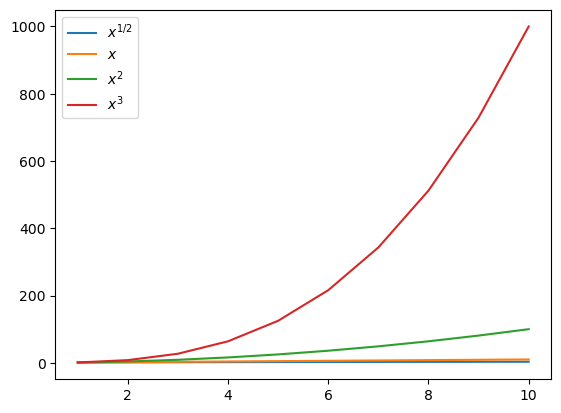

In [4]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

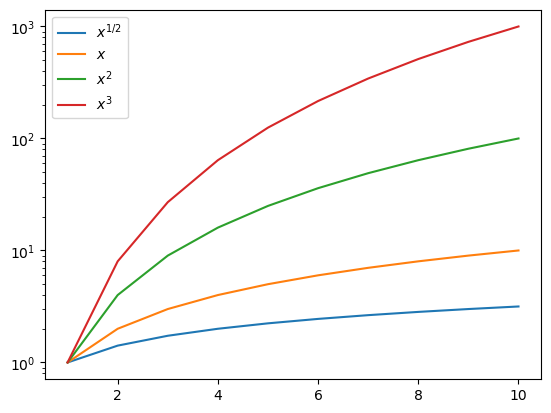

In [5]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


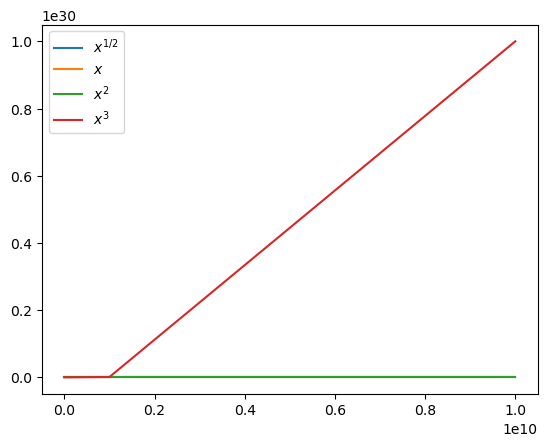

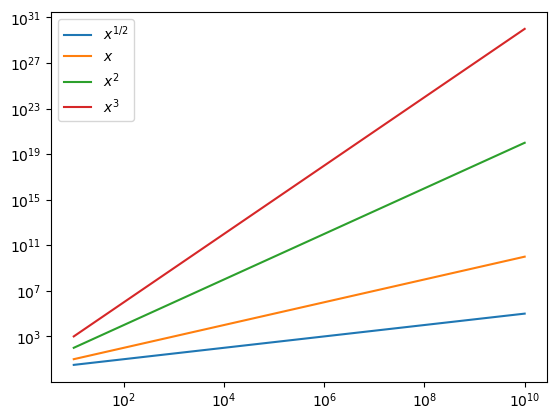

In [6]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Python float types
Information about the Python `float` type is in `sys.float_info`.

In [7]:
import sys

# printing float_info displays information about the python float type
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [8]:
# the individual properties can be accessed as follows
print("epsilon for the python float type: ", sys.float_info.epsilon)

epsilon for the python float type:  2.220446049250313e-16


-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

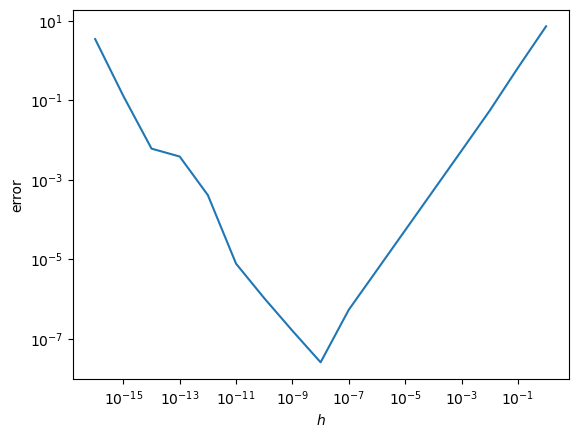

The minimum value for the magnitude of the error: 2.554135347665465e-08
The corresponding value for h: 1e-08
sqrt(epsilon): 1.4901161193847656e-08


In [9]:
from math import cos, sqrt


def fin_diff_form(f, x, h):
    dfdx = (f(x + h) - f(x)) / h
    return dfdx


x = 1
y = 1 / cos(x)**2  # the analytical derivative of tan(x)
hs = np.logspace(0, -16, 17, base=10)
errors = []
for h in hs:
    y_hat = fin_diff_form(tan, x, h)
    errors.append(abs(y_hat - y))
plt.loglog(hs, errors)
plt.xlabel("$h$")
plt.ylabel("error")
plt.show()

print(f"The minimum value for the magnitude of the error: {min(errors)}")
print(f"The corresponding value for h: {hs[np.argmin(errors)]}")
print(f"sqrt(epsilon): {sqrt(sys.float_info.epsilon)}")

#### **Answer:**

Yes, there is a minimum value for the magnitude of the error: $2.554135347665465\times 10^{-8}$.

The corresponding value for $h$ is $10^{-8}$, which is near the $\sqrt{\epsilon}\approx 1.49\times 10^{-8}$.

## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

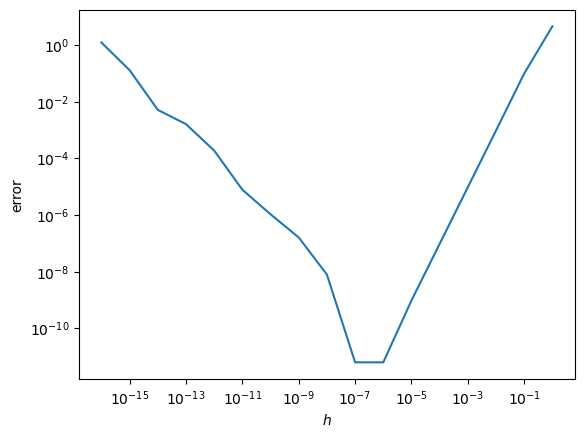

The minimum value for the magnitude of the error: 6.2239102760486276e-12
The corresponding value for h: 1e-06
epsilon**(1/3): 6.055454452393343e-06


In [10]:
def fin_diff_form(f, x, h):
    dfdx = (f(x + h) - f(x-h)) / (2*h)
    return dfdx

x = 1
y = 1 / cos(x)**2  # the analytical derivative of tan(x)
hs = np.logspace(0, -16, 17, base=10)
errors = []
for h in hs:
    y_hat = fin_diff_form(tan, x, h)
    errors.append(abs(y_hat - y))
plt.loglog(hs, errors)
plt.xlabel("$h$")
plt.ylabel("error")
plt.show()

print(f"The minimum value for the magnitude of the error: {min(errors)}")
print(f"The corresponding value for h: {hs[np.argmin(errors)]}")
print(f"epsilon**(1/3): {sys.float_info.epsilon ** (1/3)}")

#### **Answer:**

Yes, there is a minimum value for the magnitude of the error: $6.2239102760486276\times 10^{-12}$. It is reduced by using a more accurate finite difference formula.

The corresponding value for $h$ is $10^{-6}$, which is near the $\sqrt[3]{\epsilon}\approx 6.06\times 10^{-6}$. The analysis of this result is as follows:

By Taylor's Theorem,
$$
f(x+h) = f(x) + f^{'}(x)h + f^{''}(x)\frac{h^{2}}{2} + f^{'''}(\theta_{1})\frac{h^{3}}{6},\\[6pt]
f(x-h) = f(x) - f^{'}(x)h + f^{''}(x)\frac{h^{2}}{2} - f^{'''}(\theta_{2})\frac{h^{3}}{6},
$$
for some $\theta_{1}\in [x, x+h]$ and $\theta_{2}\in [x-h, x]$, so the truncation error of the centered difference approximation is bounded by $\frac{Mh^{2}}{6}$, where $M$ is a bound on $\left|{f^{''}(t)}\right|$ for $t$ near $x$. The rounding error is still bounded by $\frac{2\epsilon}{h}$. The total computational error is therefore bounded by the sum of two functions,
$$
\frac{Mh^{2}}{6} + \frac{2\epsilon}{h}.
$$
Differentiating this function with respect to $h$ and setting its derivative equal to zero, we see that the bound on the total computational error is minimized when
$$
h = \sqrt[3]{\frac{6\epsilon}{M}}.
$$


-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

Write your answer, using $\LaTeX$, in this box.

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

In [11]:
# your code here

Write your answer, using $\LaTeX$, in this box.

## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

Write your answer, using $\LaTeX$, in this box.

In [12]:
# your code here

## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

Write your answer, using $\LaTeX$, in this box.